# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\myers\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key "text.kerning_factor" on line 4 in
C:\Users\myers\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
# Read your api key environment variable
news_API = os.getenv("news_api")

In [4]:
print(news_API)

506a197b33d04c09a4b01bf7871c94d5


In [5]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key = news_API)
newsapi

In [6]:
# Fetch the Bitcoin news articles
Bitcoin = newsapi.get_everything(q="bitcoin", language="en")
Bitcoin


{'status': 'ok',
 'totalResults': 8298,
 'articles': [{'source': {'id': 'mashable', 'name': 'Mashable'},
   'author': 'Stan Schroeder',
   'title': 'Elon Musk says Tesla will resume Bitcoin purchases when Bitcoin gets greener',
   'description': "It's all about clean energy, it seems.\xa0\nElon Musk and Tesla caused ripples in the cryptocurrency market in the past few months, first by announcing that Tesla had bought $1.5 billion worth of bitcoins and that it will start accepting Bitcoin for purchases, an…",
   'url': 'https://mashable.com/article/tesla-bitcoin-purchases-green/',
   'urlToImage': 'https://mondrian.mashable.com/2021%252F06%252F14%252Fcc%252Faf6b974e89a64972a334f8675f5dc80a.36e5a.jpg%252F1200x630.jpg?signature=XiWTfhyod6_Xl2i4nyhER_1xCXQ=',
   'publishedAt': '2021-06-14T07:15:49Z',
   'content': "It's all about clean energy, it seems.\xa0\r\nElon Musk and Tesla caused ripples in the cryptocurrency market in the past few months, first by announcing that Tesla had bought $

In [7]:
# Fetch the Ethereum news articles
ETH = newsapi.get_everything(q="etherium", language="en")
ETH

{'status': 'ok',
 'totalResults': 25,
 'articles': [{'source': {'id': None, 'name': 'ExtremeTech'},
   'author': 'Ryan Whitwam',
   'title': 'GPU Prices Fall in China Following Government Mining Crackdown',
   'description': "GPU prices are not moving in the right direction. \r\n\n\nPC gamers have been suffering under the weight of the GPU shortage for the last year, but there's some hope on the horizon. China has effectively banned cryptocurrency, and whether or not you think that's …",
   'url': 'https://www.extremetech.com/gaming/324019-gpu-prices-fall-in-china-following-government-mining-crackdown',
   'urlToImage': 'https://www.extremetech.com/wp-content/uploads/2020/09/3080.jpg',
   'publishedAt': '2021-06-22T18:07:48Z',
   'content': 'PC gamers have been suffering under the weight of the GPU shortage for the last year, but there’s some hope on the horizon. China has effectively banned cryptocurrency, and whether or not you think t… [+2195 chars]'},
  {'source': {'id': None, 'nam

In [8]:
# Create the Bitcoin sentiment scores DataFrame
btc_df = pd.DataFrame.from_dict(Bitcoin["articles"])

btc_df.head()

,author,content,description,publishedAt,source,title,url,urlToImage
0,Stan Schroeder,"It's all about clean energy, it seems. \r\nElo...","It's all about clean energy, it seems. \nElon ...",2021-06-14T07:15:49Z,"{'id': 'mashable', 'name': 'Mashable'}",Elon Musk says Tesla will resume Bitcoin purch...,https://mashable.com/article/tesla-bitcoin-pur...,https://mondrian.mashable.com/2021%252F06%252F...
1,Richard Lawler,Filed under:\r\nThe supply chain attack has re...,Three days after ransomware attackers hijacked...,2021-07-05T19:45:10Z,"{'id': 'the-verge', 'name': 'The Verge'}",Kaseya ransomware attackers demand $70 million...,https://www.theverge.com/2021/7/5/22564054/ran...,https://cdn.vox-cdn.com/thumbor/nk-drxT0WYuHTT...
2,https://www.facebook.com/bbcnews,image copyrightGetty Images\r\nThe gang behind...,"The authors of a ""colossal"" ransomware attack ...",2021-07-05T12:14:34Z,"{'id': 'bbc-news', 'name': 'BBC News'}",Gang behind huge cyber-attack demands $70m in ...,https://www.bbc.co.uk/news/technology-57719820,https://ichef.bbci.co.uk/news/1024/branded_new...
3,Reuters,"SAN SALVADOR, June 16 (Reuters) - El Salvador ...",El Salvador will not replace the U.S. dollar w...,2021-06-16T17:34:00Z,"{'id': 'reuters', 'name': 'Reuters'}","El Salvador to keep dollar as legal tender, se...",https://www.reuters.com/business/el-salvador-k...,https://www.reuters.com/resizer/8_ZpjJnVb-UkP6...
4,"Tom Arnold, Karin Strohecker","LONDON, June 23 (Reuters) - El Salvador is det...",El Salvador is determined to push ahead with m...,2021-06-23T13:46:00Z,"{'id': 'reuters', 'name': 'Reuters'}","El Salvador bitcoin plan 'bulletproof', presid...",https://www.reuters.com/article/el-salvador-bi...,https://s1.reutersmedia.net/resources_v2/image...


In [9]:
# Create the Ethereum sentiment scores DataFrame
eth_df = pd.DataFrame.from_dict(ETH["articles"])

eth_df.head()

,author,content,description,publishedAt,source,title,url,urlToImage
0,Ryan Whitwam,PC gamers have been suffering under the weight...,GPU prices are not moving in the right directi...,2021-06-22T18:07:48Z,"{'id': None, 'name': 'ExtremeTech'}",GPU Prices Fall in China Following Government ...,https://www.extremetech.com/gaming/324019-gpu-...,https://www.extremetech.com/wp-content/uploads...
1,Trends Desk,Twitter was abuzz with memes and jokes after t...,Bitcoin fell around 9% and Dogecoin 8.5 % over...,2021-06-22T10:01:16Z,"{'id': None, 'name': 'The Indian Express'}",Twitter abuzz with memes and jokes after crypt...,https://indianexpress.com/article/trending/tre...,https://images.indianexpress.com/2021/06/Trend...
2,"Rashi Shrivastava, Contributor, \n Rashi Shriv...","As an underground digital artist, Itzel Yard n...",30-year-old Afro-Caribbean generative artist I...,2021-06-18T10:00:00Z,"{'id': None, 'name': 'Forbes'}",Lost In The Metaverse: Meet Itzel Yard Aka ix_...,https://www.forbes.com/sites/rashishrivastava/...,https://thumbor.forbes.com/thumbor/fit-in/1200...
3,Jo Borras,"As I type this, itâs been less than 24 hours...","As I type this, it’s been less than 24 hours s...",2021-07-12T20:00:12Z,"{'id': None, 'name': 'The Truth About Cars'}",Using Bitcoin to Pay For Your Tesla is a No-Go,https://www.thetruthaboutcars.com/2021/07/usin...,https://www.thetruthaboutcars.com/wp-content/u...
4,PR Newswire,Company Offers Inclusionary Banking For The Un...,"RockItCoin, the most trusted name in Bitcoin A...",2021-06-24T14:00:00Z,"{'id': None, 'name': 'Yahoo Entertainment'}",RockItCoinX Crypto Wallet Announces Ability To...,https://finance.yahoo.com/news/rockitcoinx-cry...,https://s.yimg.com/uu/api/res/1.2/Q.z1ED._ZAkD...


In [10]:
# Describe the Bitcoin Sentiment

btc_sentiments = []

for article in Bitcoin["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_sent_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_sent_df = btc_sent_df[cols]

btc_sent_df.head()



,date,text,compound,positive,negative,neutral
0,2021-06-14,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.000,0.831
1,2021-07-05,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705
2,2021-07-05,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857
3,2021-06-16,"SAN SALVADOR, June 16 (Reuters) - El Salvador ...",0.1280,0.043,0.000,0.957
4,2021-06-23,"LONDON, June 23 (Reuters) - El Salvador is det...",0.2023,0.105,0.057,0.838


In [11]:
# Describe the Ethereum Sentiment
eth_sentiments = []

for article in ETH["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_sent_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_sent_df = eth_sent_df[cols]
eth_sent_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.077085,0.065850,0.049350,0.884800
std,0.503965,0.083693,0.061965,0.094365
min,-0.726900,0.000000,0.000000,0.670000
25%,-0.367425,0.000000,0.000000,0.855750
50%,0.100400,0.030500,0.000000,0.889000
75%,0.402300,0.105500,0.099000,0.933750
max,0.831600,0.274000,0.160000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk

In [13]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
nltk.download('stopwords')

# Expand the default stopwords list if necessary
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\myers\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
#btc_art = btc_df['title']
#btc_art.dropna()
#btc_art = btc_art.tolist()
btc_art = btc_df["title"].tolist()
btc_art = list(btc_df["title"])
#df[df['particulars'].str.replace('/','')]


In [15]:
btc_art = '\n'.join(btc_art)

In [16]:
btc_art


'Elon Musk says Tesla will resume Bitcoin purchases when Bitcoin gets greener\nKaseya ransomware attackers demand $70 million, claim they infected over a million devices\nGang behind huge cyber-attack demands $70m in Bitcoin\nEl Salvador to keep dollar as legal tender, seeks World Bank help with bitcoin - Reuters\nEl Salvador bitcoin plan \'bulletproof\', president says - Reuters\nEl Salvador bitcoin plan "bulletproof", president says - Reuters\nUPDATE 1-El Salvador to keep dollar as legal tender, seeks World Bank help with bitcoin - Reuters\nWhat does Uber and birth control have in common?\nGold is Dead? Should You Opt for Gold (Over Crypto) in Your Portfolio?\nUPDATE 1-Bitcoin rises 9.8% to $39,035 - Reuters\nBoom, bust and bewildered: Bitcoin\'s year so far - Reuters\nCryptocurrencies tumble amid China crackdown on bitcoin miners - Reuters\nBitcoin falls 8.6% to $32540 - Reuters\nBitcoin falls 8.6% to $32,540 - Reuters\nBitcoin falls 7.4 percent to $32094 - Reuters\nBitcoin slumps a

In [17]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw)]
    
    return output

In [18]:
# Create a new tokens column for Bitcoin
btc_sent_df['tokens'] = btc_sent_df['text'].apply(tokenizer)
btc_sent_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-06-14,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.000,0.831,"[clean, energy, seemselon, musk, tesla, caused..."
1,2021-07-05,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705,"[filed, underthe, supply, chain, attack, ha, r..."
2,2021-07-05,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857,"[image, copyrightgetty, imagesthe, gang, behin..."
3,2021-06-16,"SAN SALVADOR, June 16 (Reuters) - El Salvador ...",0.1280,0.043,0.000,0.957,"[san, salvador, june, reuters, el, salvador, r..."
4,2021-06-23,"LONDON, June 23 (Reuters) - El Salvador is det...",0.2023,0.105,0.057,0.838,"[london, june, reuters, el, salvador, determin..."


In [19]:
# Create a new tokens column for Ethereum
eth_sent_df['tokens'] = eth_sent_df['text'].apply(tokenizer)

eth_sent_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-06-22,PC gamers have been suffering under the weight...,0.2846,0.163,0.160,0.677,"[pc, gamers, suffering, weight, gpu, shortage,..."
1,2021-06-22,Twitter was abuzz with memes and jokes after t...,0.2500,0.061,0.000,0.939,"[twitter, wa, abuzz, meme, joke, cryptocurrenc..."
2,2021-06-18,"As an underground digital artist, Itzel Yard n...",0.2008,0.083,0.062,0.855,"[underground, digital, artist, itzel, yard, ne..."
3,2021-07-12,"As I type this, itâs been less than 24 hours...",0.6249,0.134,0.000,0.866,"[type, le, hour, since, tesla, announced, v, f..."
4,2021-06-24,Company Offers Inclusionary Banking For The Un...,0.5256,0.096,0.000,0.904,"[company, offers, inclusionary, banking, under..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [20]:
from collections import Counter
from nltk import ngrams

In [21]:
# Generate the Bitcoin N-grams where N=2
big_string1 = btc_sent_df['text'].str.cat()
processed = tokenizer(big_string1)
bigramsB = ngrams(processed, n=2)

In [22]:
# Generate the Ethereum N-grams where N=2
big_string2 = eth_sent_df['text'].str.cat()
processed = tokenizer(big_string2)
bigramsE = ngrams(processed, n=2)

In [23]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [24]:
# Use token_count to get the top 10 words for Bitcoin
top10_btc = token_count(bigramsB, 10)
top10_btc

[(('reuters', 'bitcoin'), 6),
 (('june', 'reuters'), 5),
 (('previous', 'closebitcoin'), 5),
 (('closebitcoin', 'world'), 5),
 (('world', 'biggest'), 5),
 (('biggest', 'bestknown'), 5),
 (('reuters', 'el'), 4),
 (('el', 'salvador'), 4),
 (('bitcoin', 'legal'), 4),
 (('legal', 'tender'), 4)]

In [25]:
# Use token_count to get the top 10 words for Ethereum
top10_eth = token_count(bigramsE, 10)
top10_eth

[(('full', 'self'), 2),
 (('self', 'driving'), 2),
 (('barry', 'moore'), 2),
 (('esports', 'team'), 2),
 (('one', 'year'), 2),
 (('year', 'ago'), 2),
 (('digital', 'asset'), 2),
 (('youre', 'buying'), 2),
 (('buying', 'selling'), 2),
 (('pc', 'gamers'), 1)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

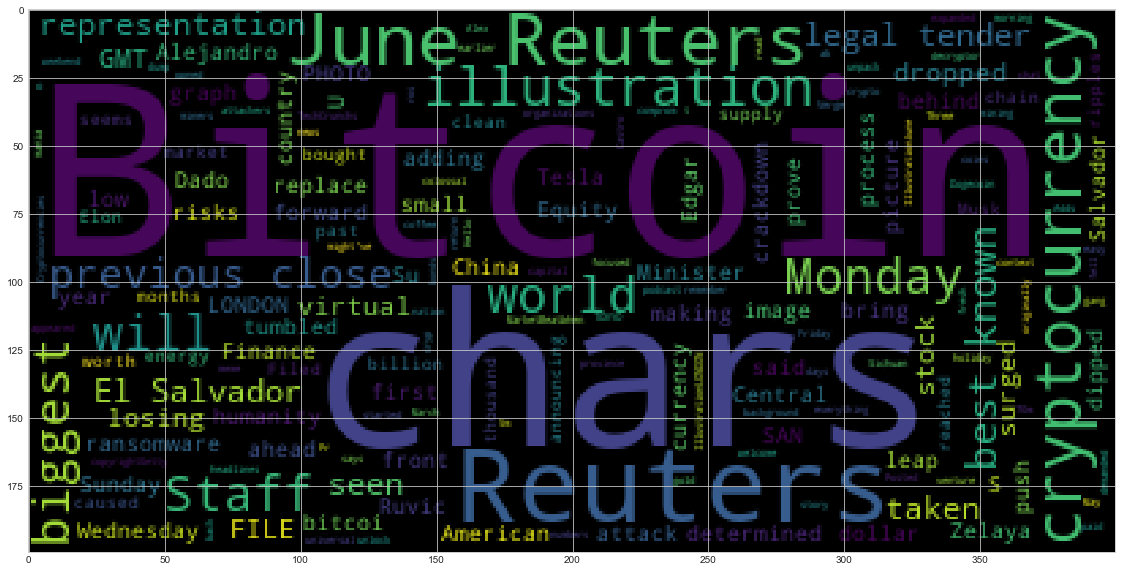

In [31]:
# Generate the Bitcoin word cloud
wc_btc = WordCloud().generate(big_string1)
plt.imshow(wc_btc)

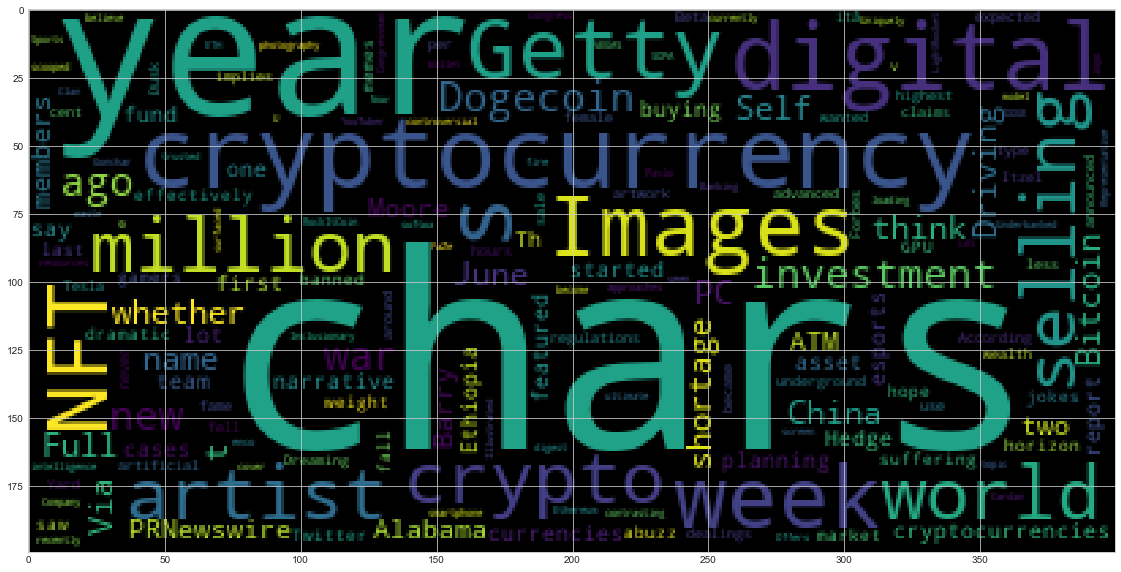

In [32]:
# Generate the Ethereum word cloud
wc_eth = WordCloud().generate(big_string2)
plt.imshow(wc_eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [34]:
import spacy
from spacy import displacy

In [36]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [37]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [39]:
# Concatenate all of the Bitcoin text together
bitcoin_text = (big_string1)

In [40]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_text)

# Add a title to the document
bitcoin_doc.user_data["NER Visualization - Bitcoin"] = "NER Visualization - Bitcoin"

In [42]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [43]:
# List all Entities
for ent in bitcoin_doc.ents:
    print(ent.text)

Elon Musk
Tesla
the past few months
Tesla
$1.5 billion
Alex Castro
The Verge
Three days
the holiday weekend
$70m
£50.5m
June 16
Reuters
El Salvador
U.S.
Alejandro Zelaya
Wednesday
Central American
June 23
Reuters
El Salvador
Pr
June 23
Reuters
El Salvador
Reuters
Reuters
El Salvador
U.S.
Alejandro Zelaya
Wednesday
the Central American
Monday
morning
earlier this year
Reuters
June 13
Reuters
9.8%
39,035.47
Sunday
3,492.71
March 15, 2021
REUTERS
Dado Ruvic/
June 30
Reuters
June 21
Reuters
Monday
China
Sichuan
as low as $32,288
first
21
Reuters
8.57%
32,540.35
2011
Monday
3,049.42
49.9%
Reuters
June 21
Reuters
8.57%
32,540.35
2011
Monday
3,049.42
June 14, 2021
REUTERS
Edgar Su/IllustrationJune 25
Reuters
7.37%
32,094.44
Monday
China
Reuters
FILE
June 7, 2021
REUTERS
Edgar Su/Illustration/File Photo
Reuters
+304
Reuters
June 25
Reuters
7.37%
32,094.44
Friday
2,554.88
50.5
May 19, 2021
REUTERS
Dado Ruvic
Reuters
5.17%
33
9.83 %
39,035.47
Sunday
3,492.71
40.7%
year
27


---

### Ethereum NER

In [44]:
# Concatenate all of the Ethereum text together
eth_text = (big_string2)

In [45]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text)

# Add a title to the document
eth_doc.user_data["NER Visualization - Etherium"] = "NER Visualization - Etherium"

In [46]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [47]:
# List all Entities
for ent in bitcoin_doc.ents:
    print(ent.text)

Elon Musk
Tesla
the past few months
Tesla
$1.5 billion
Alex Castro
The Verge
Three days
the holiday weekend
$70m
£50.5m
June 16
Reuters
El Salvador
U.S.
Alejandro Zelaya
Wednesday
Central American
June 23
Reuters
El Salvador
Pr
June 23
Reuters
El Salvador
Reuters
Reuters
El Salvador
U.S.
Alejandro Zelaya
Wednesday
the Central American
Monday
morning
earlier this year
Reuters
June 13
Reuters
9.8%
39,035.47
Sunday
3,492.71
March 15, 2021
REUTERS
Dado Ruvic/
June 30
Reuters
June 21
Reuters
Monday
China
Sichuan
as low as $32,288
first
21
Reuters
8.57%
32,540.35
2011
Monday
3,049.42
49.9%
Reuters
June 21
Reuters
8.57%
32,540.35
2011
Monday
3,049.42
June 14, 2021
REUTERS
Edgar Su/IllustrationJune 25
Reuters
7.37%
32,094.44
Monday
China
Reuters
FILE
June 7, 2021
REUTERS
Edgar Su/Illustration/File Photo
Reuters
+304
Reuters
June 25
Reuters
7.37%
32,094.44
Friday
2,554.88
50.5
May 19, 2021
REUTERS
Dado Ruvic
Reuters
5.17%
33
9.83 %
39,035.47
Sunday
3,492.71
40.7%
year
27


---